<a href="https://colab.research.google.com/github/oyinloluwa20/vision-lang4Robotics/blob/main/vision_lang4Robotics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install transformers



In [ ]:
from transformers import pipeline;
pipe = pipeline('sentiment-analysis')
pipe(['i love you', 'you are a fool'])


In [ ]:
!pip install icecream

In [ ]:
from transformers import ViltProcessor, ViltForQuestionAnswering
from PIL import Image
import torch
from icecream import ic

In [ ]:
import torch
from transformers import ViltForQuestionAnswering, ViltProcessor

def load_models():
  """Loads pre-trained ViLT model and processor for VQA."""
  model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
  processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
  return model, processor

def preprocess_image(img_path):
  """Loads and preprocesses the image for VQA."""
  try:
    from PIL import Image
  except ImportError:
    print("Please install Pillow library: pip install Pillow")
    return None

  image = Image.open(img_path).convert('RGB')  # Ensure RGB format
  return image

# def get_answer(model, processor, image_inputs, question):
#   """Gets the answer to the given question about the image."""
#   with torch.no_grad():
#     outputs = model(**image_inputs, question=question)
#     logits = outputs.logits
#     answer_id = logits.argmax(-1).item()
#     return model.config.id2label[answer_id]


def get_answer(model, processor, image, question):
  inputs = processor(image, question, return_tensors= 'pt')
  with torch.no_grad():
    outputs = model(**inputs)
    logits = outputs.logits
    idx= logits.argmax(-1).item()
    return model.config.id2label[idx]

def main():
  """Loads models, processes image, and interacts with user for questions."""
  model, processor = load_models()

  # Handle potential errors during image loading
  image_inputs = preprocess_image("apen.jpg")
  if image_inputs is None:
    return

  suggestions = ["describe the image","his he walking his dog or just standing","does he have a dog","what is the man doing"]
  print("Type 'exit' to quit.")
  print("Here are some suggestions:", suggestions)

  while True:
    question = input("Question >>> ")
    if question == "exit":
      break

    answer = get_answer(model, processor, image_inputs, question)
    print("Answer:", answer)

if __name__ == "__main__":
  main()


Type 'exit' to quit.
Here are some suggestions: ['describe the image', 'his he walking his dog or just standing', 'does he have a dog', 'what is the man doing']
Answer: nothing
Answer: yes
Answer: walking


In [ ]:
def load_models():
  model = ViltForQuestionAnswering.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
  processor = ViltProcessor.from_pretrained("dandelin/vilt-b32-finetuned-vqa")
  return model, processor

def show_image(img_path):
  image = image.open(img_path)
  image.show()
  return image

def get_answer(model, processor, image, question):
  inputs = processor(image, question, return_tensors= 'pt')
  with torch.nograd():
    outputs = model(**inputs)
    logits = outputs.logits
    idx= logits.argmax(-1).item()
    return model.config.id2label[idx]

  def main():
    model, processor = load_models
    img_path ='apex.jpg'
    image = show_image(img_path)
    suggestions = ['describe the image']

    ic(suggestions)
    while True:
      question = input("Question >>>")
      answer = get_answer(model, processor, image, question)

    if __name__ == "__main__":
      main()

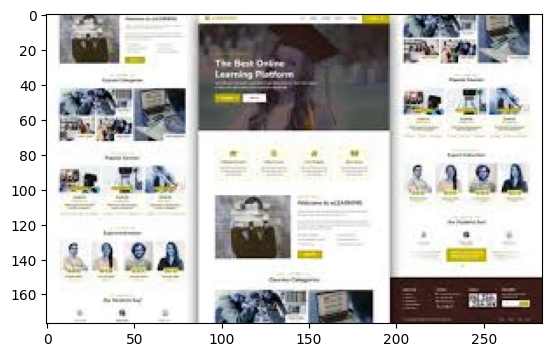

In [ ]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

img = cv2.imread('apex.jpg')
# img_cvt = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.show()